In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path , header=None , names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


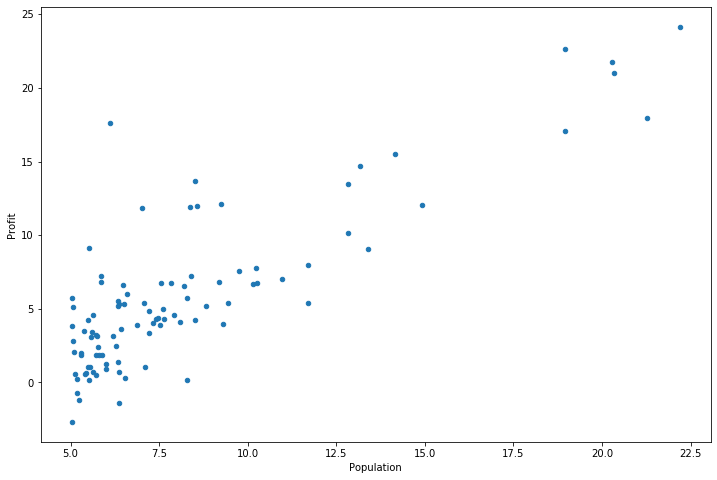

In [4]:
data.plot(kind='scatter' ,x='Population' , y='Profit' , figsize = (12,8))
plt.show()

# 计算代价函数

In [5]:
def computeCost(X , y ,theta):
    inner = np.power( ( (X*theta.T) - y) , 2)
    return np.sum(inner) / (2* len(X)) #sum所有元素求和

In [6]:
data.insert(0 , 'Ones' , 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
cols = data.shape[1]#返回的是列数
X = data.iloc[: , 0:cols-1] #提取data中前cols-1列，返回X训练集
y = data.iloc[: , cols-1 : cols]#提取data中最后一列，返回y中

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X.values) #数组转矩阵进行运算
y= np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #theta是1*2数组

In [11]:
theta

matrix([[0, 0]])

In [12]:
X.shape, y.shape , theta.shape

((97, 2), (97, 1), (1, 2))

In [13]:
(X*theta.T).shape #与y进行相减

(97, 1)

In [14]:
computeCost(X , y ,theta) #代价函数 ，不是求theta ,其实就是个样本的差的平方求和 ，这里theta为0

32.072733877455676

# 梯度下降

In [15]:
def gradDecline(theta , X , y ,iters , alpha):
    parameters = theta.shape[1]
     # parameters = int (theta.ravel().shape[1] )
    m = X.shape[0] #len(X)
    temp = np.matrix( np.zeros(theta.shape)) 
    #cost = np.zeros(iters)
    
    for i in range(iters):
        #****为什么放下面term表达式在里面不行****
        error = ( X * theta.T ) - y#误差
        for j in range(parameters):
            # X下标是特征数 ， 上标是样本个数  这里是特征数
            term = np.multiply( error , X[:,j] )
            #term = np.multiply( (( X * theta.T ) - y) , X[:,j] )
            #temp[0 , j] = theta[0 , j] - ( (alpha /len(X) ) * np.sum(term))
            temp[0 , j] = theta[0 , j] - ( (alpha /m ) * np.sum(term))
        theta = temp
        #cost[i] = computeCost(X , y ,theta)
    #return theta , cost
    return theta 

In [16]:
iters =1000 
alpha = 0.01

In [17]:
g = gradDecline(theta , X , y ,iters , alpha)
g

matrix([[-3.24140214,  1.1272942 ]])

In [18]:
computeCost(X , y ,g) 

4.515955503078912

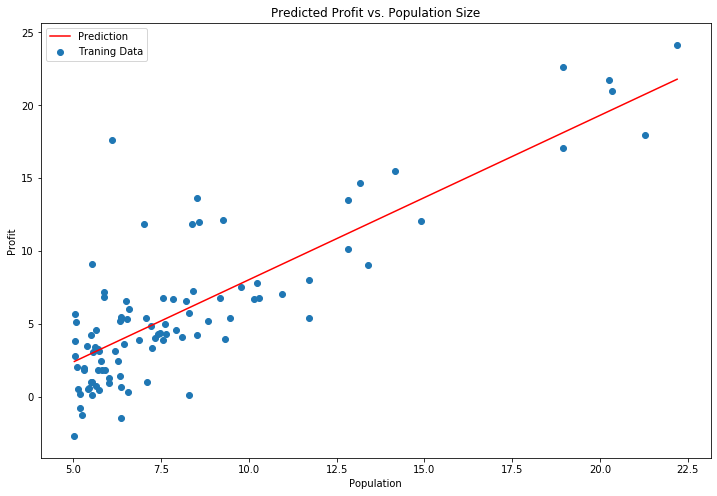

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [20]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(np.arange(iters), cost, 'r')
# ax.set_xlabel('Iterations')
# ax.set_ylabel('Cost')
# ax.set_title('Error vs. Training Epoch')
# plt.show()

In [21]:
data2 = pd.read_csv('ex1data2.txt' , header=None , names =['Size' , 'Bedrooms' , 'Price'] )
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 特征缩放

In [22]:
data2 = (data2 - data2.mean())/data2.std() 

In [23]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [24]:
data2.insert(0 , 'Ones' , 1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [25]:
cols = data2.shape[1]
X2 = data2.iloc[: , 0:cols-1] 
y2 = data2.iloc[: , cols-1 : cols]

In [26]:
X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [27]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [28]:
#表格转为矩阵
X2 = np.matrix(X2.values)
#X2.values # 返回的是数组
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0 , 0 ,0]))
computeCost(X2 , y2 ,theta2)

0.48936170212765967

In [29]:
theta2 = gradDecline(theta2 , X2 , y2 ,iters , alpha)
theta2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

In [30]:
computeCost(X2, y2, theta2)

0.13070336960771892

# 正规方程

In [31]:
def normalEqn(X , y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [32]:
theta3 = normalEqn(X2 , y2)
theta3

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])